In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [3]:
extraction_dir = './survey-dataset/'

# List the files in the directory
extracted_files = os.listdir(extraction_dir)
extracted_files

['.DS_Store',
 'transformed_data.csv',
 'data.csv',
 'transformed_task_wise.csv',
 'Task-wise.csv',
 'correlation_matrix.csv']

In [4]:
file_path = os.path.join(extraction_dir, 'data.csv') # data.csv is user-wise data
print(file_path)

./survey-dataset/data.csv


In [5]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(file_path)

# Print all columns
print(df.columns)

Index(['id', 'control task name', 'control task correctness',
       'control task validity', 'control task time in seconds',
       'control task answer', 'control task actions', 'ct-task-easiness',
       'ct-task-length', 'ct-task-interruption', 'ct-bug-found',
       'ct-bug-description', 'ct-debugger-help', 'ct-debugger-enjoy',
       'ct-debugger-efficient', 'ct-debugger-intuitive',
       'ct-debugger-easiness', 'ct-debugger-learn', 'treatment task name',
       'treatment task correctness', 'treatment task validity',
       'treatment task time in seconds', 'treatment task answer',
       'treatment task actions', 'tt-task-easiness', 'tt-task-length',
       'tt-task-interruption', 'tt-bug-found', 'tt-bug-description',
       'tt-debugger-help', 'tt-debugger-enjoy', 'tt-debugger-efficient',
       'tt-debugger-intuitive', 'tt-debugger-easiness', 'tt-debugger-learn',
       'experiment-easiness', 'experiment-length', 'ocd-help',
       'ocd-performance', 'ocd-productivity', 'ocd

In [20]:
data = pd.read_csv(file_path)

# Define columns to be extracted for control and treatment tasks
user_specific_columns = [
    'id', 'ocd-help', 'ocd-performance', 'ocd-productivity', 'ocd-effectiveness', 'ocd-easiness', 'ocd-usefulness',
    'learn-ocd', 'ocd-tasks-help', 'ocd-interaction', 'ocd-skills', 'ocd-debugging', 'ocd-use', 'ocd-future', 
    'ocd-over-classical', 'education', 'job-position', 'program-exp', 'pharo-exp', 'code-frequency', 
    'pharo-frequency', 'debugger-familiarity', 'debugger-ocd-familarity'
]

# Transform control and treatment specific columns to common columns and transform the user wise data to task wise data
control_columns = user_specific_columns + ['control task name', 'control task correctness', 'control task validity', 
                                           'control task time in seconds', 'control task answer', 'control task actions'] + \
                  [col for col in data.columns if col.startswith('ct-')]

treatment_columns = user_specific_columns + ['treatment task name', 'treatment task correctness', 'treatment task validity', 
                                             'treatment task time in seconds', 'treatment task answer', 'treatment task actions'] + \
                    [col for col in data.columns if col.startswith('tt-')]

# Create DataFrame for control tasks
control_data = data[control_columns].copy()
control_data['task'] = control_data['control task name']
control_data['condition'] = 'control'

# Create DataFrame for treatment tasks
treatment_data = data[treatment_columns].copy()
treatment_data['task'] = treatment_data['treatment task name']
treatment_data['condition'] = 'treatment'

# Standardize column names for merging
control_data.columns = user_specific_columns + ['task_name', 'correctness', 'validity', 'time_in_seconds', 'answer', 'actions'] + \
                       [col.replace('ct-', '') for col in control_data.columns[len(user_specific_columns)+6:-2]] + ['task', 'condition']

treatment_data.columns = user_specific_columns + ['task_name', 'correctness', 'validity', 'time_in_seconds', 'answer', 'actions'] + \
                         [col.replace('tt-', '') for col in treatment_data.columns[len(user_specific_columns)+6:-2]] + ['task', 'condition']

# Remove the 'task_name' column as it is now redundant
control_data = control_data.drop(columns=['task_name'])
treatment_data = treatment_data.drop(columns=['task_name'])

# Combine the control and treatment DataFrames
combined_data = pd.concat([control_data, treatment_data], ignore_index=True)

# Save the transformed data to a new CSV file
combined_data.to_csv(f"{extraction_dir}/transformed_data.csv", index=False, quoting=1)

# Display the first few rows of the transformed data
combined_data.head()

,id,ocd-help,ocd-performance,ocd-productivity,ocd-effectiveness,ocd-easiness,ocd-usefulness,learn-ocd,ocd-tasks-help,ocd-interaction,...,bug-found,bug-description,debugger-help,debugger-enjoy,debugger-efficient,debugger-intuitive,debugger-easiness,debugger-learn,task,condition
0,User-70721c71-20d5-0d00-a35f-0b230f90ea5645210...,,,,,,,,,,...,,,,,,,,,Lights Out,control
1,User-88a6276f-6bd5-0d00-a386-0d050eac3a2a50500...,Nor disagree or agree,Nor disagree or agree,Disagree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Lights Out,control
2,User-a2904209-ccc2-0d00-9778-6c840e6ed7ae51481...,Agree,Agree,Agree,Agree,Agree,Agree,Nor disagree or agree,Agree,Agree,...,Yes,One of the corner switches could not be switch...,Normally,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Lights Out,control
3,User-20d31f99-86c4-0d00-a363-69a60df93b8251470...,Strongly Agree,Agree,Agree,Strongly Agree,Nor disagree or agree,Agree,Strongly Agree,Agree,Strongly Agree,...,Yes,wrong data set with a not necessary space char...,Moderately,Agree,Nor disagree or agree,Disagree,Disagree,No choice,Ammolite,control
4,User-4a048f49-eec8-0d00-89f7-047b0e96ebda52859...,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Ammolite,control


In [87]:
# Load the data
transformed_data = pd.read_csv(os.path.join(extraction_dir, 'Task-wise.csv'))  
transformed_data.head()

# Trim leading and trailing whitespace from all string columns using apply and map
transformed_data = transformed_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [88]:
# List of columns to inspect based on the presence
columns_to_inspect = [
    'task','condition','ocd-help', 'ocd-performance', 'ocd-productivity', 'ocd-effectiveness', 'ocd-easiness',
    'ocd-usefulness', 'learn-ocd', 'ocd-tasks-help', 'ocd-interaction', 'ocd-skills', 'ocd-debugging',
    'ocd-use', 'ocd-future', 'ocd-over-classical', 'education', 'job-position', 'program-exp', 
    'pharo-exp', 'code-frequency', 'pharo-frequency', 'debugger-familiarity', 'debugger-ocd-familarity', 
    'task-easiness', 'task-length', 'task-interruption', 'bug-found', 'debugger-help', 'debugger-enjoy', 
    'debugger-efficient', 'debugger-intuitive', 'debugger-easiness', 'debugger-learn'
]

# Inspect unique values for each column in the list
unique_values = {col: transformed_data[col].unique() if col in transformed_data.columns else f"{col} not found" for col in columns_to_inspect}
unique_values

{'task': array(['Lights Out', 'Ammolite', ''], dtype=object),
 'condition': array(['control', 'treatment'], dtype=object),
 'ocd-help': array(['', 'Nor disagree or agree', 'Agree', 'Strongly Agree',
        'No choice', 'Disagree'], dtype=object),
 'ocd-performance': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree'], dtype=object),
 'ocd-productivity': array(['', 'Disagree', 'Agree', 'No choice', 'Nor disagree or agree',
        'Strongly Agree'], dtype=object),
 'ocd-effectiveness': array(['', 'Nor disagree or agree', 'Agree', 'Strongly Agree',
        'No choice'], dtype=object),
 'ocd-easiness': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree', 'Disagree'], dtype=object),
 'ocd-usefulness': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree', 'Disagree'], dtype=object),
 'learn-ocd': array(['', 'Nor disagree or agree', 'Strongly Agree', 'No choice',
        'Agree', 'Disagree'], dtype=

In [89]:
qualitative_mapping = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Nor disagree or agree": 3,
    "Disagree": 2,
    "Strongly Disagree": 1,
    "No choice": 0,
    "": -1  # Mapping empty values to -1
}

education_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "High School but did not graduate": 0,
    "High School": 1,
    "High School graduate or GED": 1,
    "Some college or 2-year degree": 2,
    "Bachelor in STEM (Science, Technology, Engineering and Mathematics)": 3,
    "Bachelor in CS (Computer Science)": 3,
    "Master in CS": 4,
    "Master in STEM": 4,
    "PhD or higher academic title in STEM": 5,
    "PhD or higher academic title in CS": 5,
    "PhD or higher academic title in a different area than CS or STEM": 5
}

experience_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "< 1": 1,
    "1-2 years": 2,
    "3-5 years": 3,
    "6-10 years": 4,
    "More than 10":5,
    "More than 10 years": 5
}

frequency_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "At least once per year":1,
    "Less than once per month": 1,
    "At least once per month": 2,
    "At least once per week": 3,
    "At least once per day": 4,
}

interruption_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    '1-2 minutes': 1,
    'up to 5 minutes': 2,
    'up to 10 minutes': 3,
    'more than 10 minutes': 4,
    "Not interrupted": 5,
}

job_position_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "Student": 1,
    "Full-Time Dev": 2,
    "Part-Time Dev": 3,
    "Unemployed": 4,
    "No choice": 5,
    "Self-Employed": 6
}

bug_found_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "Yes": 1,
    "No": 2
}

bug_validity_mapping = {
    "": -1,  # Mapping empty values to -1
    "No choice": 0,
    "nil": 0,
    "TRUE": 1,
    "FALSE": 2 
}

debugger_help_mapping = {
    "Not at all": 1,
    "Slightly": 2,
    "Moderately": 3,
    "Normally": 4,
    "Extremely": 5,
    "No choice": 0,
    "": -1  # Mapping empty values to -1
}

condition_mapping = {
    "treatment": 2,
    "control": 1,
    "No choice": 0,
    "": -1  # Mapping empty values to -1
}

task_name_mapping = {
    "Lights Out": 2,
    "Ammolite": 1,
    "No choice": 0,
    "": -1  # Mapping empty values to -1
}

In [90]:
# Replace empty strings with NaNs and then fill NaNs with default values for specific columns
transformed_data = transformed_data.replace("", pd.NA).fillna({
    'condition': "No choice",
    'task': "No choice",
    'ocd-help': "No choice",
    'ocd-performance': "No choice",
    'ocd-productivity': "No choice",
    'ocd-effectiveness': "No choice",
    'ocd-easiness': "No choice",
    'ocd-usefulness': "No choice",
    'learn-ocd': "No choice",
    'ocd-tasks-help': "No choice",
    'ocd-interaction': "No choice",
    'ocd-skills': "No choice",
    'ocd-debugging': "No choice",
    'ocd-use': "No choice",
    'ocd-future': "No choice",
    'ocd-over-classical': "No choice",
    'education': "No choice",
    'job-position': "No choice",
    'program-exp': "No choice",
    'pharo-exp': "No choice",
    'code-frequency': "No choice",
    'pharo-frequency': "No choice",
    'debugger-familiarity': "No choice",
    'debugger-ocd-familarity': "No choice",
    'task-easiness': "No choice",
    'task-length': "No choice",
    'task-interruption': "No choice",
    'validity': "No choice",
    'correctness': "No choice",
    'bug-found': "No choice",
    'debugger-help': "No choice",
    'debugger-enjoy': "No choice",
    'debugger-efficient': "No choice",
    'debugger-intuitive': "No choice",
    'debugger-easiness': "No choice",
    'debugger-learn': "No choice"
})

In [91]:
# Apply the mappings to the dataset
transformed_data.replace({
    'condition': condition_mapping,
    'task': task_name_mapping,
    'ocd-help': qualitative_mapping,
    'ocd-performance': qualitative_mapping,
    'ocd-productivity': qualitative_mapping,
    'ocd-effectiveness': qualitative_mapping,
    'ocd-easiness': qualitative_mapping,
    'ocd-usefulness': qualitative_mapping,
    'learn-ocd': qualitative_mapping,
    'ocd-tasks-help': qualitative_mapping,
    'ocd-interaction': qualitative_mapping,
    'ocd-skills': qualitative_mapping,
    'ocd-debugging': qualitative_mapping,
    'ocd-use': qualitative_mapping,
    'ocd-future': qualitative_mapping,
    'ocd-over-classical': qualitative_mapping,
    'education': education_mapping,
    'job-position': job_position_mapping,
    'program-exp': experience_mapping,
    'pharo-exp': experience_mapping,
    'code-frequency': frequency_mapping,
    'pharo-frequency': frequency_mapping,
    'debugger-familiarity': qualitative_mapping,
    'debugger-ocd-familarity': qualitative_mapping,
    'task-easiness': qualitative_mapping,
    'task-length': qualitative_mapping,
    'task-interruption': interruption_mapping,
    'validity': bug_validity_mapping,
    'correctness': bug_validity_mapping,
    'bug-found': bug_found_mapping,
    'debugger-help': debugger_help_mapping,
    'debugger-enjoy': qualitative_mapping,
    'debugger-efficient': qualitative_mapping,
    'debugger-intuitive': qualitative_mapping,
    'debugger-easiness': qualitative_mapping,
    'debugger-learn': qualitative_mapping
}, inplace=True)

# Save the transformed data to a new CSV file for further analysis
transformed_data.to_csv(f"{extraction_dir}/transformed_task_wise.csv", index=False, quoting=1)

# Display the first few rows to confirm the changes
print(transformed_data.head())

                                                  id  task  condition  \
0  User-70721c71-20d5-0d00-a35f-0b230f90ea5645210...     2          1   
1  User-88a6276f-6bd5-0d00-a386-0d050eac3a2a50500...     2          1   
2  User-a2904209-ccc2-0d00-9778-6c840e6ed7ae51481...     2          1   
3  User-20d31f99-86c4-0d00-a363-69a60df93b8251470...     1          1   
4  User-4a048f49-eec8-0d00-89f7-047b0e96ebda52859...     1          1   

   ocd-help  ocd-performance  ocd-productivity  ocd-effectiveness  \
0         0                0                 0                  0   
1         3                3                 2                  3   
2         4                4                 4                  4   
3         5                4                 4                  5   
4         0                0                 0                  0   

   ocd-easiness  ocd-usefulness  learn-ocd  ...  task-length  \
0             0               0          0  ...            0   
1             3   

/var/folders/sl/9nkjwp050j37649nk4d77v480000gn/T/ipykernel_43585/508639852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_data.replace({


In [104]:
transformed_file_path = os.path.join(extraction_dir, 'transformed_task_wise.csv') # transformed_task_wise.csv is task-wise data
data = pd.read_csv(transformed_file_path)
print(data.columns)
print(data.head())
print(data.info())

Index(['id', 'task', 'condition', 'ocd-help', 'ocd-performance',
       'ocd-productivity', 'ocd-effectiveness', 'ocd-easiness',
       'ocd-usefulness', 'learn-ocd', 'ocd-tasks-help', 'ocd-interaction',
       'ocd-skills', 'ocd-debugging', 'ocd-use', 'ocd-future',
       'ocd-over-classical', 'education', 'job-position', 'program-exp',
       'pharo-exp', 'code-frequency', 'pharo-frequency',
       'debugger-familiarity', 'debugger-ocd-familarity', 'correctness',
       'validity', 'time_in_seconds', 'answer', 'actions', 'task-easiness',
       'task-length', 'task-interruption', 'bug-found', 'bug-description',
       'debugger-help', 'debugger-enjoy', 'debugger-efficient',
       'debugger-intuitive', 'debugger-easiness', 'debugger-learn'],
      dtype='object')
                                                  id  task  condition  \
0  User-70721c71-20d5-0d00-a35f-0b230f90ea5645210...     2          1   
1  User-88a6276f-6bd5-0d00-a386-0d050eac3a2a50500...     2          1   
2  Us

In [105]:
# drop unnecessary columns
data.drop(columns=['id', 'answer', 'bug-description'],axis=1,inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   task                     148 non-null    int64  
 1   condition                148 non-null    int64  
 2   ocd-help                 148 non-null    int64  
 3   ocd-performance          148 non-null    int64  
 4   ocd-productivity         148 non-null    int64  
 5   ocd-effectiveness        148 non-null    int64  
 6   ocd-easiness             148 non-null    int64  
 7   ocd-usefulness           148 non-null    int64  
 8   learn-ocd                148 non-null    int64  
 9   ocd-tasks-help           148 non-null    int64  
 10  ocd-interaction          148 non-null    int64  
 11  ocd-skills               148 non-null    int64  
 12  ocd-debugging            148 non-null    int64  
 13  ocd-use                  148 non-null    int64  
 14  ocd-future               1

In [121]:
# Sanitize column names to avoid special characters issues
data.columns = data.columns.str.replace('-', '_').str.replace(' ', '_').str.replace(')', '')
print(data.columns)

Index(['task', 'condition', 'ocd_help', 'ocd_performance', 'ocd_productivity',
       'ocd_effectiveness', 'ocd_easiness', 'ocd_usefulness', 'learn_ocd',
       'ocd_tasks_help', 'ocd_interaction', 'ocd_skills', 'ocd_debugging',
       'ocd_use', 'ocd_future', 'ocd_over_classical', 'education',
       'job_position', 'program_exp', 'pharo_exp', 'code_frequency',
       'pharo_frequency', 'debugger_familiarity', 'debugger_ocd_familarity',
       'correctness', 'validity', 'time_in_seconds', 'actions',
       'task_easiness', 'task_length', 'task_interruption', 'bug_found',
       'debugger_help', 'debugger_enjoy', 'debugger_efficient',
       'debugger_intuitive', 'debugger_easiness', 'debugger_learn'],
      dtype='object')


In [124]:

# Ensure all relevant columns are treated as numerical
data['condition'] = pd.to_numeric(data['condition'], errors='coerce')
data['task'] = pd.to_numeric(data['task'], errors='coerce')
data['correctness'] = pd.to_numeric(data['correctness'], errors='coerce')
data['time_in_seconds'] = pd.to_numeric(data['time_in_seconds'], errors='coerce')
data['actions'] = pd.to_numeric(data['actions'], errors='coerce')

In [125]:
df = data
print(df.columns)
df.to_csv(f"{extraction_dir}/sample_transformed_task_wise.csv", index=False, quoting=1)

Index(['task', 'condition', 'ocd_help', 'ocd_performance', 'ocd_productivity',
       'ocd_effectiveness', 'ocd_easiness', 'ocd_usefulness', 'learn_ocd',
       'ocd_tasks_help', 'ocd_interaction', 'ocd_skills', 'ocd_debugging',
       'ocd_use', 'ocd_future', 'ocd_over_classical', 'education',
       'job_position', 'program_exp', 'pharo_exp', 'code_frequency',
       'pharo_frequency', 'debugger_familiarity', 'debugger_ocd_familarity',
       'correctness', 'validity', 'time_in_seconds', 'actions',
       'task_easiness', 'task_length', 'task_interruption', 'bug_found',
       'debugger_help', 'debugger_enjoy', 'debugger_efficient',
       'debugger_intuitive', 'debugger_easiness', 'debugger_learn'],
      dtype='object')


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import numpy as np

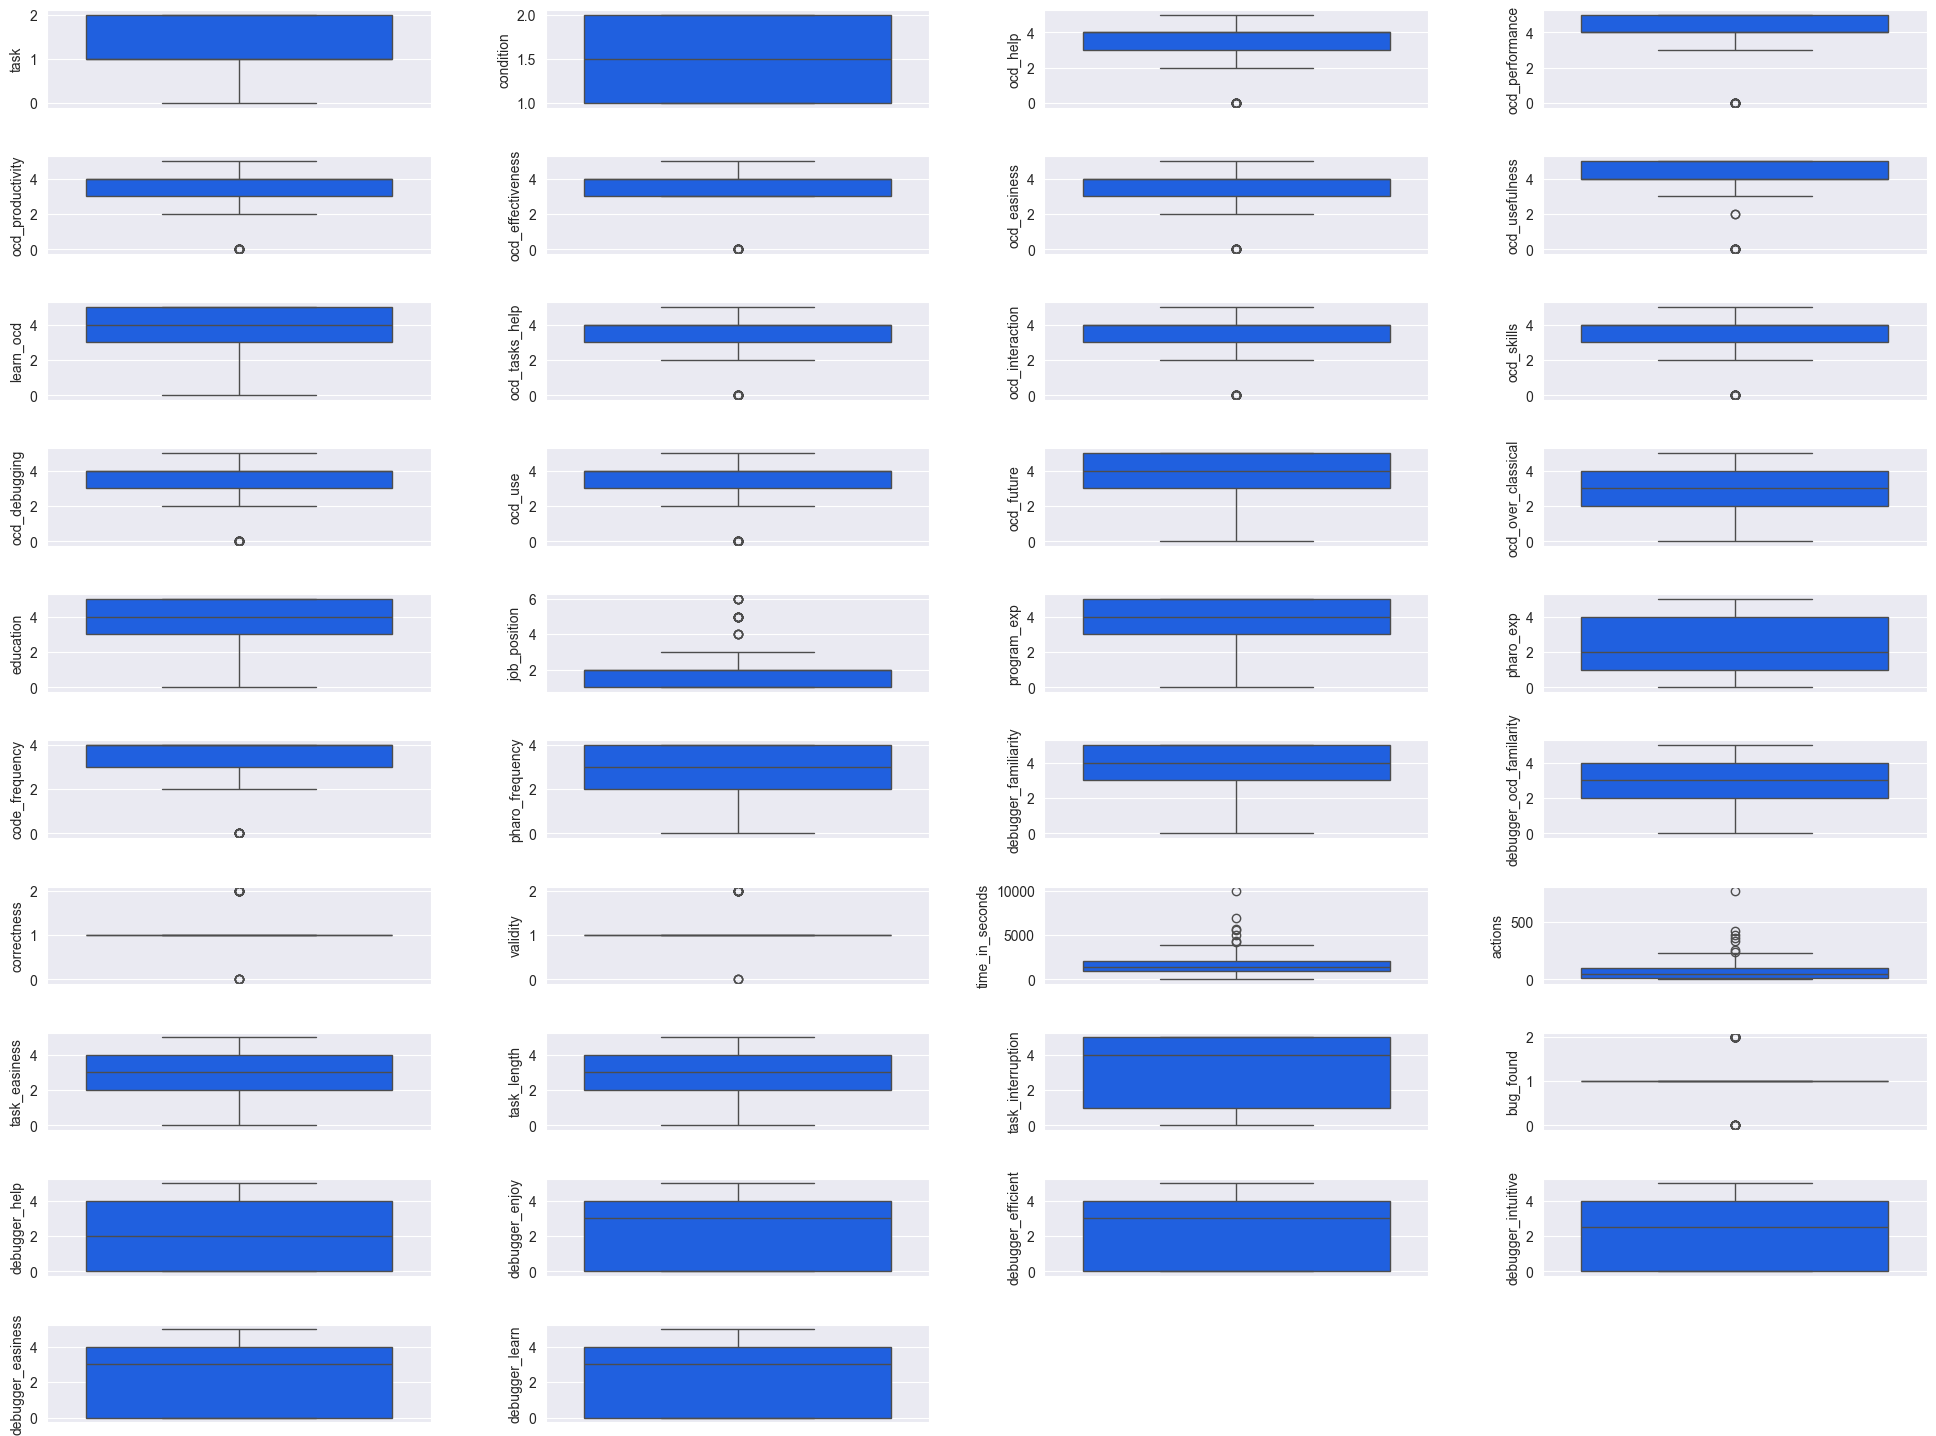

In [127]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(exclude='object').columns.values
categorical_cols = df.select_dtypes(include='object').columns.values

OrderedCols = np.concatenate([numerical_cols,  categorical_cols])

# Determine the number of rows and columns for subplots
num_cols = 4
num_rows = int(np.ceil(len(OrderedCols) / num_cols))

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i // num_cols
    y = i % num_cols
    sns.boxplot(data=df, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(10)
    ax[x,y].xaxis.label.set_size(10)

for j in range(i + 1, num_rows * num_cols):
    x = j // num_cols
    y = j % num_cols
    fig.delaxes(ax[x, y])

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

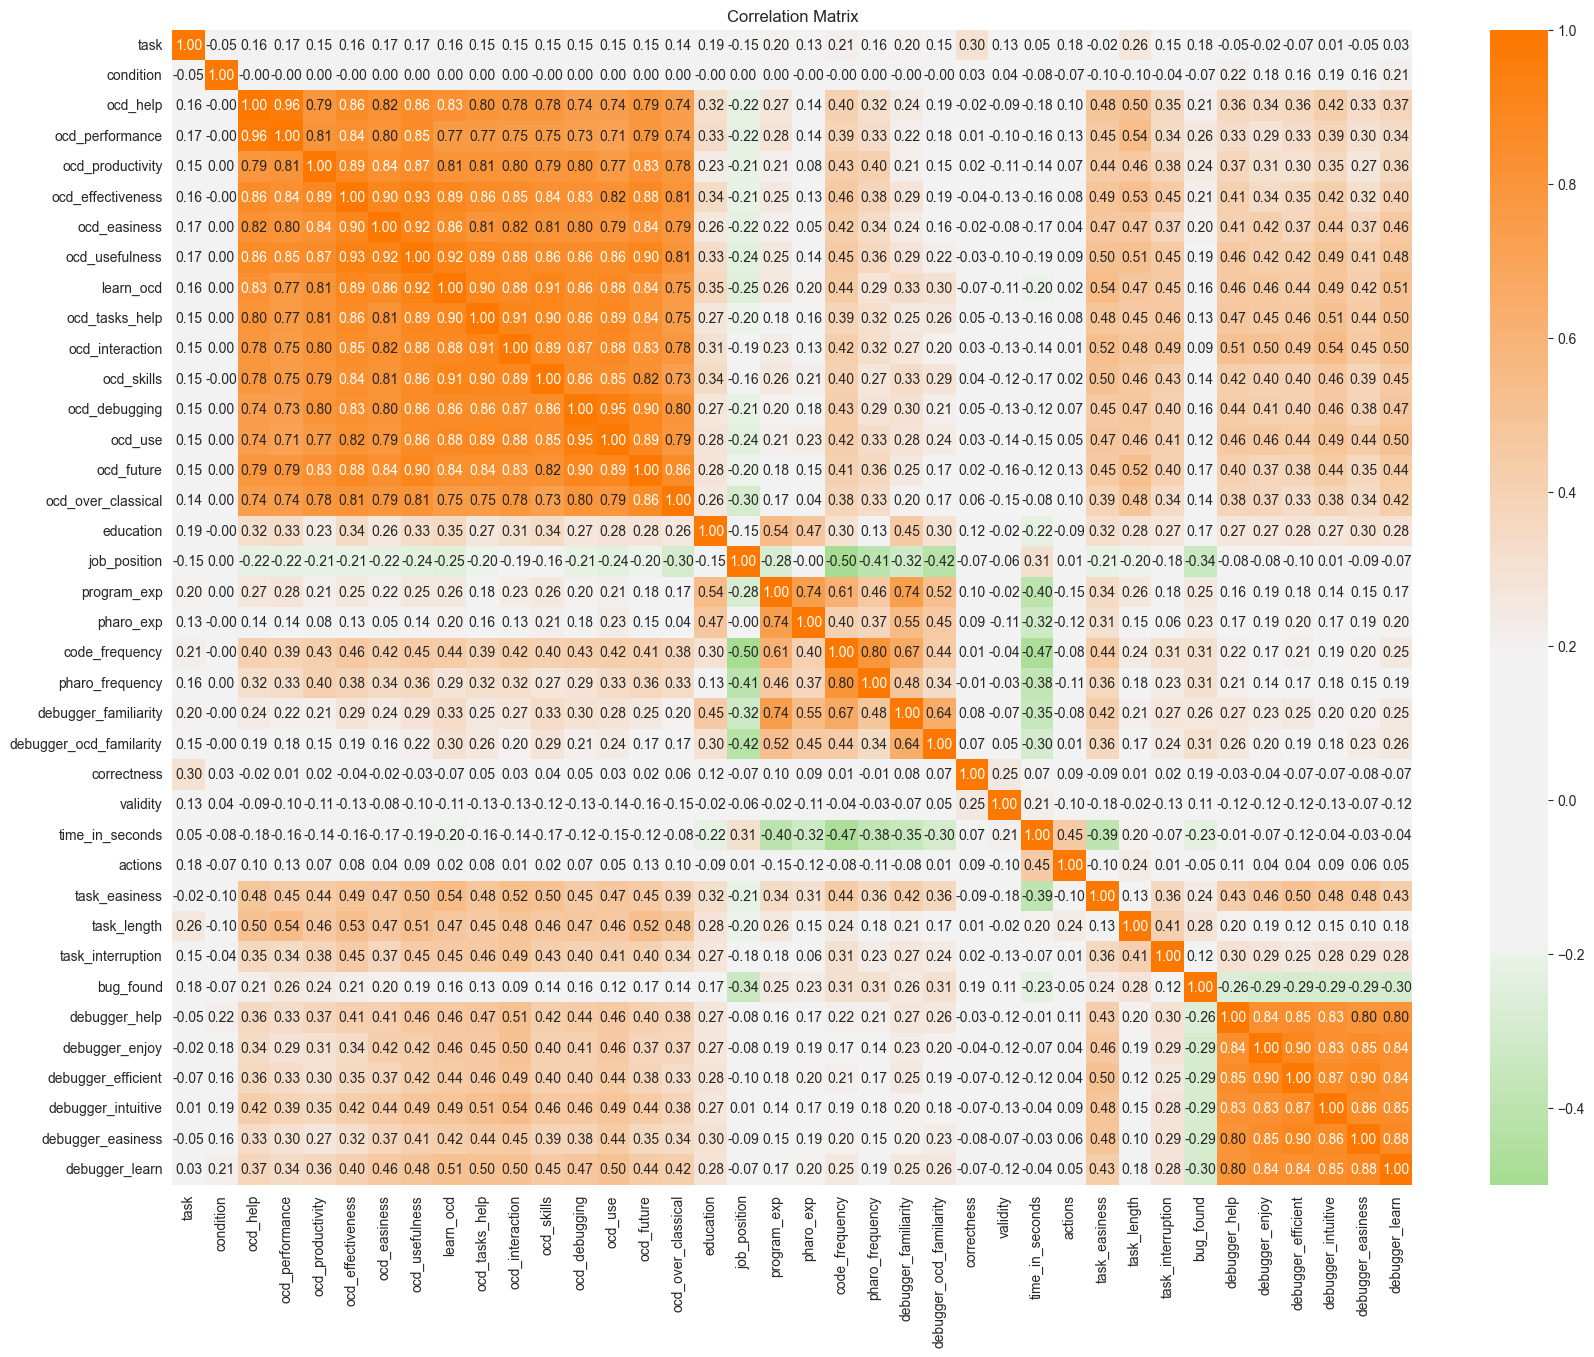

In [131]:
# Calculate the correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr().round(2)

# Display the correlation matrix
#print(correlation_matrix)
correlation_matrix.to_csv(f"{extraction_dir}/correlation_matrix.csv")  

# Plot the correlation matrix in a heatmap
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
plt.figure(figsize=(20, 15), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0,fmt='.2f')
plt.title('Correlation Matrix')

# Save the plot as a PDF
plt.savefig(f"{extraction_dir}/correlation_matrix.png")

plt.show()

In [249]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure necessary columns are present
columns_needed = [
    'task','time_in_seconds', 'actions', 'correctness', 'condition', 'bug_found', 'ocd_performance','ocd_productivity','ocd_over_classical',
    'education', 'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency','job_position',
    'task_easiness', 'task_length','task_interruption', 'debugger_familiarity', 'debugger_ocd_familarity','debugger_help', 'debugger_easiness'
]

data = df[columns_needed].copy()

#print(data)

In [250]:
# Perform OLS regression
def build_regression_model(data, dependent_var, independent_vars, control_vars):
    X = data[independent_vars + control_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Standardize the predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns='const', errors='ignore'))
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns[1:], index=X.index)  # Ensure columns are named correctly
    X_scaled_df = sm.add_constant(X_scaled_df)  # Re-add constant after scaling
    
    model = sm.Logit(y, X).fit()
    model_scaled = sm.Logit(y, X_scaled_df).fit()
    
    print(f"Regression analysis for '{dependent_var}':")
    print(model.summary())
    
    # Calculate and print effect sizes for significant variables
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    for var in significant_vars:
        if var != 'const':
            try:
                effect_size = model_scaled.params[var]
                print(f"Effect size for {var}: {effect_size} (standardized beta)")
            except KeyError as e:
                print(f"Effect size for {var}: not available ({e})")

# Hypotheses for regression models
bug_found_independent_vars = ['task','condition','ocd_over_classical']
bug_found_control_vars = ['program_exp', 'pharo_exp', 'pharo_frequency','education','job_position', 'task_easiness','task_length','task_interruption']


# Inspect the initial unique values in bug_found column
print("Initial unique values in bug_found:", data['bug_found'].unique())

# Drop rows with NaN values in the 'bug_found' column
data = data.dropna(subset=['bug_found'])

# Verify the unique values after dropping NaNs
print("Unique values in bug_found after dropping NaNs:", data['bug_found'].unique())

# Map bug_found to binary (1 and 2 -> 1, 0 -> 0), handle all other values explicitly
data['bug_found'] = data['bug_found'].map({0: 0, 1: 0, 2: 1})

# Verify the conversion
print("Unique values in bug_found after mapping:", data['bug_found'].unique())

# Ensure bug_found column is integer type
data['bug_found'] = data['bug_found'].astype(int)

# Verify final unique values
print("Final unique values in bug_found:", data['bug_found'].unique())

# Drop rows with any remaining NaN values in other columns
data_cleaned = data.dropna()

# Example: Perform regression analysis for 'bug found'
regression_summary = build_regression_model(data_cleaned, 'bug_found', bug_found_independent_vars,bug_found_control_vars)
print(regression_summary)

# Calculate VIF for each independent variable
X = data_cleaned[bug_found_independent_vars+bug_found_control_vars]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

Initial unique values in bug_found: [0 2 1]
Unique values in bug_found after dropping NaNs: [0 2 1]
Unique values in bug_found after mapping: [0 1]
Final unique values in bug_found: [0 1]
Optimization terminated successfully.
         Current function value: 0.485669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.485669
         Iterations 6
Regression analysis for 'bug_found':
                           Logit Regression Results                           
Dep. Variable:              bug_found   No. Observations:                  145
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.1334
Time:                        00:21:44   Log-Likelihood:                -70.422
converged:                       True   LL-Null:                       -81.263
Covariance Type:  

,Variable,VIF
0,const,47.198217
1,task,1.079357
2,condition,1.034313
3,ocd_over_classical,1.610706
4,program_exp,2.653342
5,pharo_exp,2.636789
6,pharo_frequency,1.590099
7,education,1.536075
8,job_position,1.333619
9,task_easiness,1.494139


OLS Regression analysis for 'time_in_seconds':
                            OLS Regression Results                            
Dep. Variable:        time_in_seconds   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     9.009
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           7.22e-12
Time:                        00:40:07   Log-Likelihood:                -1206.3
No. Observations:                 145   AIC:                             2437.
Df Residuals:                     133   BIC:                             2472.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

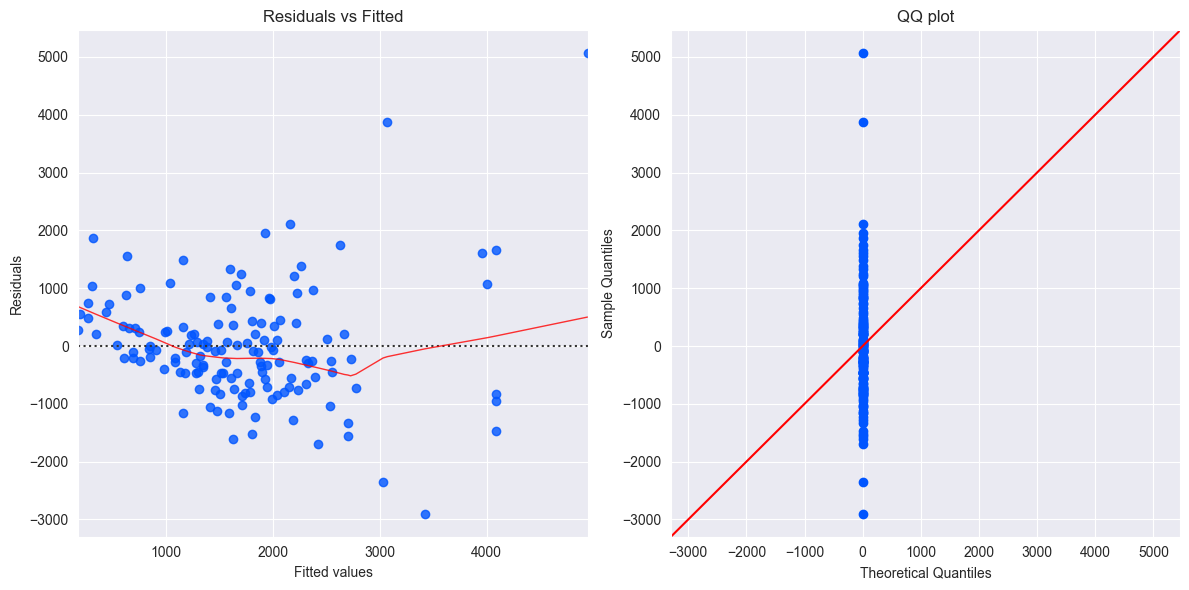

In [254]:
# Inspect the initial unique values in time_in_seconds column
#print("Initial unique values in time_in_seconds:", data['time_in_seconds'].unique())

# Drop rows with NaN values in the 'time_in_seconds' column
data = data.dropna(subset=['time_in_seconds'])

# Verify the unique values after dropping NaNs
#print("Unique values in time_in_seconds after dropping NaNs:", data['time_in_seconds'].unique())

# Drop rows with any remaining NaN values
data_cleaned = data.dropna()

# Function to build and print OLS regression summary with effect sizes
def build_ols_regression_model(data, dependent_var, primary_vars, control_vars):
    X = data[primary_vars + control_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Standardize the predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns='const', errors='ignore'))
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns[1:], index=X.index)  # Ensure columns are named correctly
    X_scaled_df = sm.add_constant(X_scaled_df)  # Re-add constant after scaling
    
    model = sm.OLS(y, X).fit()
    model_scaled = sm.OLS(y, X_scaled_df).fit()
    
    print(f"OLS Regression analysis for '{dependent_var}':")
    print(model.summary())
    
    # Calculate and print effect sizes (standardized beta) for significant variables
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    for var in significant_vars:
        if var != 'const':
            try:
                effect_size = model_scaled.params[var]
                print(f"Effect size for {var}: {effect_size} (standardized beta)")
            except KeyError as e:
                print(f"Effect size for {var}: not available ({e})")

    return model

time_independent_vars = ['task','condition']
time_control_vars = ['program_exp', 'pharo_exp', 'pharo_frequency','education','job_position', 'task_easiness', 'task_length','task_interruption','bug_found']

# Example: Perform regression analysis for 'time_in_seconds'
regression_model = build_ols_regression_model(data_cleaned,'time_in_seconds', time_independent_vars,time_control_vars)
print(regression_model)

# Calculate VIF for each independent variable
X = data_cleaned[time_independent_vars+time_control_vars]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

# Plot residuals
residuals = regression_model.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Residuals vs Fitted
sns.residplot(x=regression_model.fittedvalues, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('QQ plot')

plt.tight_layout()
plt.show()

Robust Regression analysis for 'log_time_in_seconds':
                     Robust linear Model Regression Results                    
Dep. Variable:     log_time_in_seconds   No. Observations:                  145
Model:                             RLM   Df Residuals:                      133
Method:                           IRLS   Df Model:                           11
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 25 Jun 2024                                         
Time:                         00:51:27                                         
No. Iterations:                     21                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

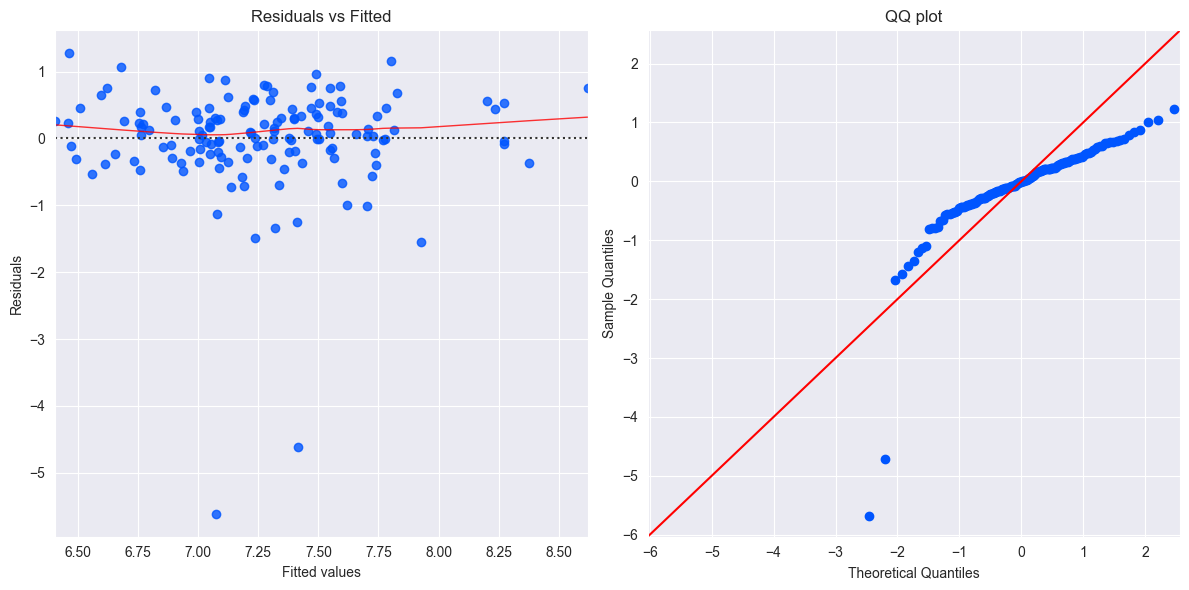

In [259]:
from statsmodels.formula.api import rlm

# Log-transform the dependent variable
data_cleaned['log_time_in_seconds'] = np.log(data_cleaned['time_in_seconds'])

# Function to build and print robust regression summary
def build_robust_regression_model(data, dependent_var, primary_vars, control_vars):
    X = data[primary_vars + control_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Standardize the predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns='const', errors='ignore'))
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns[1:], index=X.index)  # Ensure columns are named correctly
    X_scaled_df = sm.add_constant(X_scaled_df)  # Re-add constant after scaling
    
    model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
    model_scaled = sm.RLM(y, X_scaled_df, M=sm.robust.norms.HuberT()).fit()
    
    print(f"Robust Regression analysis for '{dependent_var}':")
    print(model.summary())
    
    # Calculate and print effect sizes (standardized beta) for significant variables
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    for var in significant_vars:
        if var != 'const':
            try:
                effect_size = model_scaled.params[var]
                print(f"Effect size for {var}: {effect_size} (standardized beta)")
            except KeyError as e:
                print(f"Effect size for {var}: not available ({e})")
    
    return model

# Define primary independent and control variables
time_independent_vars = ['condition']
time_control_vars = ['task','program_exp', 'pharo_exp', 'pharo_frequency', 'education', 'job_position', 'task_easiness', 'task_length', 'task_interruption', 'bug_found']

# Perform robust regression analysis for 'log_time_in_seconds'
model_robust = build_robust_regression_model(data_cleaned, 'log_time_in_seconds', time_independent_vars, time_control_vars)

# Calculate VIF for each independent variable
X = data_cleaned[time_independent_vars + time_control_vars]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Plot residuals
residuals = model_robust.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Residuals vs Fitted
sns.residplot(x=model_robust.fittedvalues, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('QQ plot')

plt.tight_layout()
plt.show()


Robust Regression analysis for 'actions':
                    Robust linear Model Regression Results                    
Dep. Variable:                actions   No. Observations:                  145
Model:                            RLM   Df Residuals:                      134
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 25 Jun 2024                                         
Time:                        00:58:59                                         
No. Iterations:                    20                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

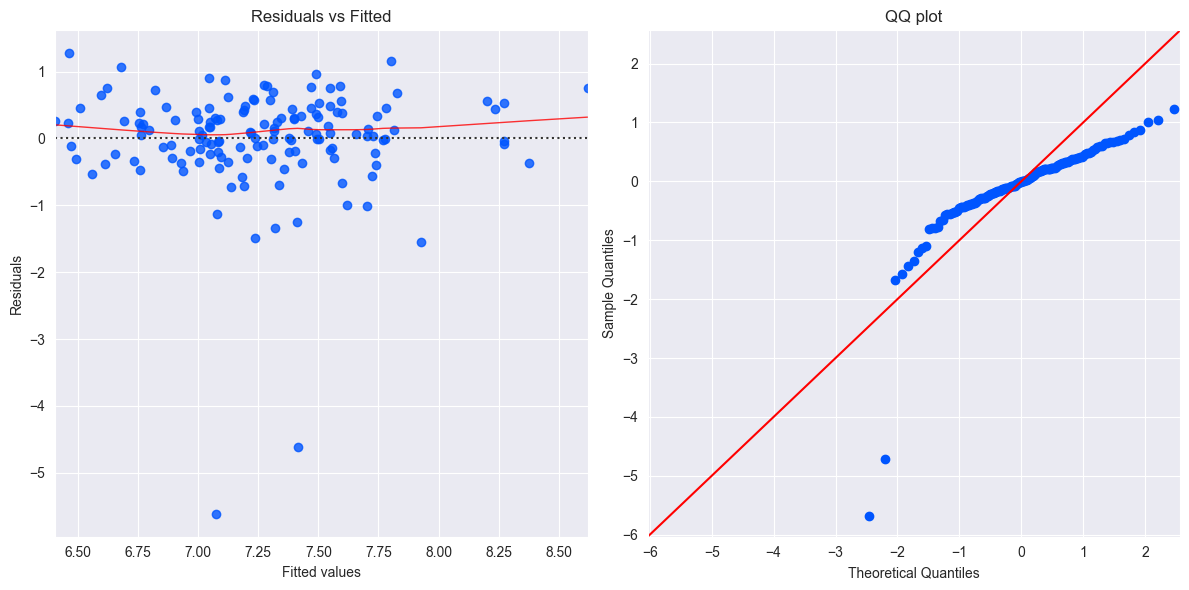

In [261]:
# Inspect the initial unique values in time_in_seconds column
#print("Initial unique values in actions:", data['actions'].unique())

# Drop rows with NaN values in the 'actions' column
data = data.dropna(subset=['actions'])

# Verify the unique values after dropping NaNs
#print("Unique values in actions after dropping NaNs:", data['actions'].unique())

# Drop rows with any remaining NaN values
data_cleaned = data.dropna()

actions_independent_vars = ['condition']
actions_control_vars = ['task','ocd_over_classical','program_exp', 'pharo_exp', 'pharo_frequency','education','job_position', 'task_easiness', 'task_length']

# Example: Perform regression analysis for 'bug found'
#regression_summary = build_ols_regression_model(data_cleaned,'actions', actions_independent_vars,actions_control_vars)
regression_summary = build_robust_regression_model(data_cleaned,'actions', actions_independent_vars,actions_control_vars)

print("Regression analysis for 'actions':")
print(regression_summary)

# Calculate VIF for each independent variable
X = data_cleaned[actions_independent_vars+actions_control_vars]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Plot residuals
residuals = model_robust.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Residuals vs Fitted
sns.residplot(x=model_robust.fittedvalues, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('QQ plot')

plt.tight_layout()
plt.show()

In [203]:
# Split the data based on the condition
control_data = data_cleaned[data_cleaned['condition'] == 1]
treatment_data = data_cleaned[data_cleaned['condition'] == 2]

# Build regression models for control group
print("Control Group Analysis:")
#build_regression_model(control_data, 'time_in_seconds', time_independent_vars)
build_regression_model(control_data, 'bug_found', bug_found_independent_vars)
#build_regression_model(control_data, 'actions', actions_independent_vars)

# Build regression models for treatment group
print("\nTreatment Group Analysis:")
#build_regression_model(treatment_data, 'time_in_seconds', time_independent_vars)
build_regression_model(treatment_data, 'bug_found', bug_found_independent_vars)
#build_regression_model(treatment_data, 'actions', actions_independent_vars)

Control Group Analysis:
Regression analysis for 'bug_found'
                            OLS Regression Results                            
Dep. Variable:              bug_found   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3.375
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           0.000648
Time:                        00:11:54   Log-Likelihood:                -42.971
No. Observations:                  74   AIC:                             113.9
Df Residuals:                      60   BIC:                             146.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------